#***PART 1*** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mydataset = pd.read_excel("cleaned_data.xlsx")

In [ ]:
# mydataset.set_index(list(mydataset.columns)[0],inplace=True)
# mydataset.to_csv("cleaned_data.csv")

In [2]:
mydataset = pd.read_csv("cleaned_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# According to Attribute Oriented Induction, data genralizatio can be performed in either of two ways : 1. Attribute removal 2. Attribute genralization.
# First we will perform Attribute removal, we remove the attributes that have large set of distinct values or its concepts can be expresses by other attributes they can be removed.
# According to the above rule we remove some attributes from the data.

char_rules = mydataset.copy()
char_rules.drop(char_rules.columns[[0,1,5,6,7,8,10,13,14,15,16,19,20,21,23,24,26,28,29,31]], axis = 1, inplace = True)

char_rules['Price_per_unit_area'] = char_rules['Price_per_unit_area'].apply(lambda x : int(str(x).replace(",","")))
char_rules['Size'] = char_rules['Size'].apply(lambda x: int(x[:-6].replace(",","")) )
char_rules['Price'] = char_rules['Price'].apply(lambda x: float(x.replace(",","")))


In [4]:
char_rules

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_ready_to_move,is_studio
0,Apartment,Under Construction,4285,ACTIVE,Ahmedabad,3 BHK,7500000.0,1750,Unfurnished,True,False,False
1,Apartment,Under Construction,7000,ACTIVE,Ahmedabad,4 BHK,23688000.0,3384,Unfurnished,True,False,False
2,Apartment,Ready to move,5752,ACTIVE,Ahmedabad,3 BHK,13200840.0,2295,Unfurnished,False,True,False
3,Apartment,Ready to move,2486,ACTIVE,Ahmedabad,2 BHK,2283000.0,918,Unfurnished,False,True,False
4,Apartment,Under Construction,5324,ACTIVE,Ahmedabad,3 BHK,9371000.0,1760,Unfurnished,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
143703,Apartment,Under Construction,9826,ACTIVE,Mumbai,1 BHK,3400000.0,346,Unfurnished,True,False,False
143704,Apartment,Under Construction,8568,ACTIVE,Mumbai,1 BHK,3650000.0,426,Unfurnished,True,False,False
143705,Apartment,Under Construction,9861,ACTIVE,Mumbai,1 BHK,3550000.0,360,Unfurnished,True,False,False
143706,Apartment,Under Construction,8813,ACTIVE,Mumbai,2 BHK,5200000.0,590,Unfurnished,True,False,False


In [5]:
# Now coming into Attribute generalization.
# 1. We have taken Active properties which are under construction and ready to move.

stat = char_rules[(char_rules['Property_building_status'] != 'ACTIVE') ].index
char_rules.drop(stat, inplace = True)
char_rules

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_ready_to_move,is_studio
0,Apartment,Under Construction,4285,ACTIVE,Ahmedabad,3 BHK,7500000.0,1750,Unfurnished,True,False,False
1,Apartment,Under Construction,7000,ACTIVE,Ahmedabad,4 BHK,23688000.0,3384,Unfurnished,True,False,False
2,Apartment,Ready to move,5752,ACTIVE,Ahmedabad,3 BHK,13200840.0,2295,Unfurnished,False,True,False
3,Apartment,Ready to move,2486,ACTIVE,Ahmedabad,2 BHK,2283000.0,918,Unfurnished,False,True,False
4,Apartment,Under Construction,5324,ACTIVE,Ahmedabad,3 BHK,9371000.0,1760,Unfurnished,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
143703,Apartment,Under Construction,9826,ACTIVE,Mumbai,1 BHK,3400000.0,346,Unfurnished,True,False,False
143704,Apartment,Under Construction,8568,ACTIVE,Mumbai,1 BHK,3650000.0,426,Unfurnished,True,False,False
143705,Apartment,Under Construction,9861,ACTIVE,Mumbai,1 BHK,3550000.0,360,Unfurnished,True,False,False
143706,Apartment,Under Construction,8813,ACTIVE,Mumbai,2 BHK,5200000.0,590,Unfurnished,True,False,False


In [6]:
temp = char_rules.copy()

# Next we classify cities Hyderabad, Chennai, Mumbai, Bangalore has Technology cities and remaining as other cities.
# Next we classify buildings with range of price per unit area 1. [100, 10000] -> Budeget 2. [10000, 50000] -> Luxury 3. [50000, 100000] -> Ultra Luxury
char_rules['City_name'] = np.where((char_rules['City_name'] == 'Hyderabad') | (char_rules['City_name'] == 'Chennai') | (char_rules['City_name'] == 'Bangalore' ) | (char_rules['City_name'] == 'Mumbai'), 'Technology Cities', 'Other Cities')
conditions = [(char_rules['Price_per_unit_area'] > 100) & (char_rules['Price_per_unit_area'] < 10000),
              (char_rules['Price_per_unit_area'] >= 10000) & (char_rules['Price_per_unit_area'] < 50000),
              (char_rules['Price_per_unit_area'] >= 50000) & (char_rules['Price_per_unit_area'] < 100000),
             ]

values = ['Budget', 'Luxury', 'Ultra Luxury']
char_rules['Price_per_unit_area'] = np.select(conditions, values)
    
char_rules

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_ready_to_move,is_studio
0,Apartment,Under Construction,Budget,ACTIVE,Other Cities,3 BHK,7500000.0,1750,Unfurnished,True,False,False
1,Apartment,Under Construction,Budget,ACTIVE,Other Cities,4 BHK,23688000.0,3384,Unfurnished,True,False,False
2,Apartment,Ready to move,Budget,ACTIVE,Other Cities,3 BHK,13200840.0,2295,Unfurnished,False,True,False
3,Apartment,Ready to move,Budget,ACTIVE,Other Cities,2 BHK,2283000.0,918,Unfurnished,False,True,False
4,Apartment,Under Construction,Budget,ACTIVE,Other Cities,3 BHK,9371000.0,1760,Unfurnished,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
143703,Apartment,Under Construction,Budget,ACTIVE,Technology Cities,1 BHK,3400000.0,346,Unfurnished,True,False,False
143704,Apartment,Under Construction,Budget,ACTIVE,Technology Cities,1 BHK,3650000.0,426,Unfurnished,True,False,False
143705,Apartment,Under Construction,Budget,ACTIVE,Technology Cities,1 BHK,3550000.0,360,Unfurnished,True,False,False
143706,Apartment,Under Construction,Budget,ACTIVE,Technology Cities,2 BHK,5200000.0,590,Unfurnished,True,False,False


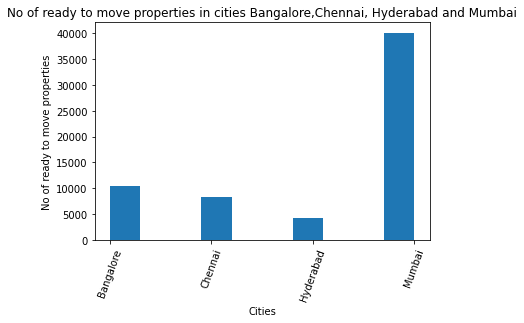

In [7]:
tech_cities_ready = temp[((temp['City_name'] == "Bangalore") | (temp['City_name'] == "Chennai") | (temp['City_name'] == "Hyderabad") | (temp['City_name'] == "Mumbai") ) & (temp['Property_status'] == 'Ready to move')]

plt.title("No of ready to move properties in cities Bangalore,Chennai, Hyderabad and Mumbai")
plt.hist(tech_cities_ready['City_name'])
plt.xticks(rotation="70")
plt.xlabel("Cities")
plt.ylabel("No of ready to move properties")
plt.show()

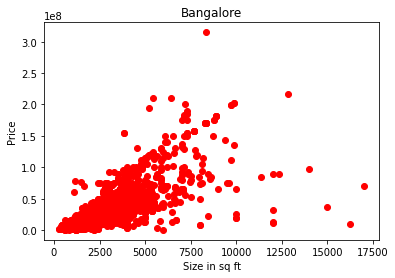

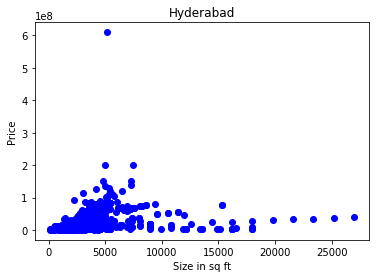

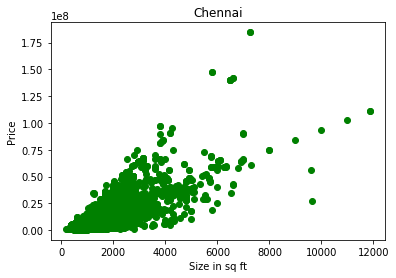

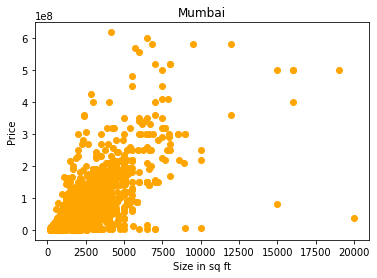

In [8]:
# Visualizing the trend of property price VS property size in Technology cities that are ready to move

plt.title("Bangalore")
plt.scatter(tech_cities_ready[tech_cities_ready.City_name == "Bangalore"]['Size'],tech_cities_ready[tech_cities_ready.City_name=="Bangalore"]['Price'],color="red")
plt.xlabel("Size in sq ft")
plt.ylabel("Price")
plt.show()

plt.title("Hyderabad")
plt.scatter(tech_cities_ready[tech_cities_ready.City_name == "Hyderabad"]['Size'],tech_cities_ready[tech_cities_ready.City_name=="Hyderabad"]['Price'],color="blue")
plt.xlabel("Size in sq ft")
plt.ylabel("Price")
plt.show()

plt.title("Chennai")
plt.scatter(tech_cities_ready[tech_cities_ready.City_name == "Chennai"]['Size'],tech_cities_ready[tech_cities_ready.City_name=="Chennai"]['Price'],color="green")
plt.xlabel("Size in sq ft")
plt.ylabel("Price")
plt.show()

plt.title("Mumbai")
plt.scatter(tech_cities_ready[tech_cities_ready.City_name == "Mumbai"]['Size'],tech_cities_ready[tech_cities_ready.City_name=="Mumbai"]['Price'],color="orange")
plt.xlabel("Size in sq ft")
plt.ylabel("Price")
plt.show()

Text(0.5, 1.0, 'Average Price per unit area')

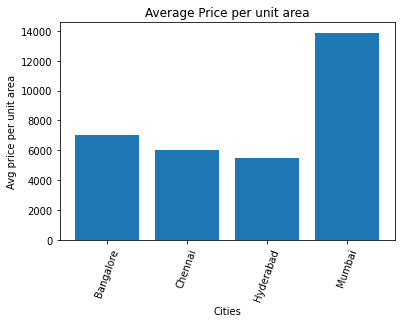

In [9]:
# Now let us visualize the average price per unit area in each of the city, so that the investors can know the affordable cities for investing on large size properties.
city_groupby = tech_cities_ready[['City_name','Price_per_unit_area']].groupby(['City_name']).mean()
puas = city_groupby['Price_per_unit_area']
least_pua_cities = city_groupby.index

plt.bar(least_pua_cities,puas)
plt.xticks(rotation = 70)
plt.xlabel("Cities")
plt.ylabel("Avg price per unit area")
plt.title("Average Price per unit area")

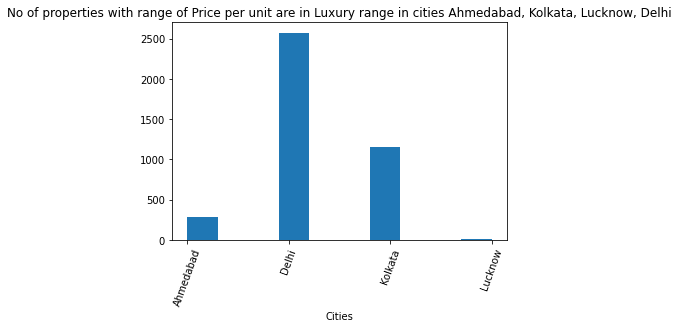

In [10]:
conditions = [(temp['Price_per_unit_area'] > 100) & (temp['Price_per_unit_area'] < 10000),
              (temp['Price_per_unit_area'] >= 10000) & (temp['Price_per_unit_area'] < 50000),
              (temp['Price_per_unit_area'] >= 50000) & (temp['Price_per_unit_area'] < 100000),
             ]

values = ['Budget', 'Luxury', 'Ultra Luxury']
temp['Price_per_unit_area'] = np.select(conditions, values)

other_cities_ready = temp[((temp['City_name'] == "Ahmedabad") | (temp['City_name'] == "Kolkata") | (temp['City_name'] == "Lucknow") | (temp['City_name'] == "Delhi") ) & (temp['Price_per_unit_area'] == "Luxury")]
#other_cities_ready


plt.title("No of properties with range of Price per unit are in Luxury range in cities Ahmedabad, Kolkata, Lucknow, Delhi")
plt.hist(other_cities_ready['City_name'])
plt.xticks(rotation = "70")
plt.xlabel("Cities")
# plt.ylabel("No of properties with range of Price per unit are in Luxury range")
plt.show()